# Predict the onset of diabetes based on diagnostic measures

* [Dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In [2]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [9]:
df = pd.read_csv("dataset/diabetes.csv")
df.columns
df.head(5)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Exploration

In [51]:
df.corr()["Outcome"]

Pregnancies                 0.221898
Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

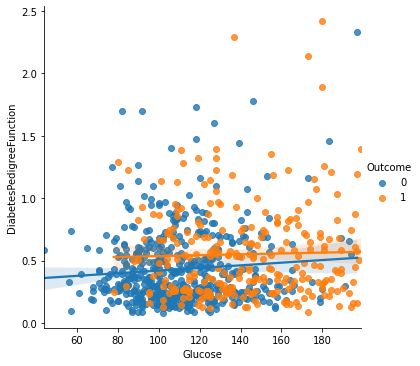

In [52]:
sns.lmplot(x="Glucose", y="DiabetesPedigreeFunction", data=df, hue="Outcome")

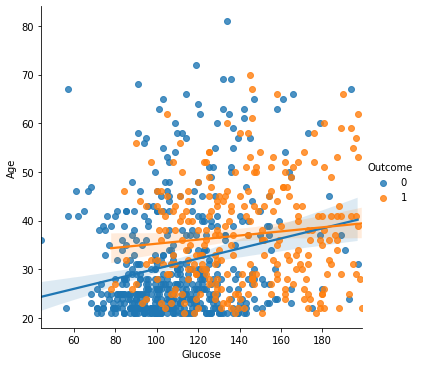

In [53]:
sns.lmplot(x="Glucose", y="Age", data=df, hue="Outcome")

## Handle missing values

In [14]:
cols_with_missing_values = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_missing_values] = df.loc[:, cols_with_missing_values].replace(0, np.NAN)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


## Split training and testing data

In [15]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

## Find the best imputation strategy

In [ ]:
# from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

# def evaluate_best_param_for_imputer(imputer_cls, params):
#     params_scores = {}
#     for strategy in strategies:
#     cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
#     scores = cross_val_score(estimator, X_train, y_train, scoring="accuracy", n_jobs=-1)
#     print(f"Parameter value {strategy} score:  {scores.mean()}")
#     strategy_scores[strategy] = scores.mean()

In [34]:
from sklearn.ensemble import RandomForestClassifier

# using simple imputation strategy
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline

# lets find the best strategy to use for imputing
strategies = ["mean", "median", "most_frequent", "constant"]

strategy_scores = {}
for strategy in strategies:
    pipeline = Pipeline(
        [
            ("imputer", SimpleImputer(strategy=strategy, fill_value=0)),
            ("classifier", RandomForestClassifier(n_estimators=500, random_state=42)),
        ]
    )
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
    scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring="accuracy", n_jobs=-1)
    print(f"Strategy and score: {strategy}, {scores.mean()}")
    strategy_scores[strategy] = scores.mean()

max_score = max(strategy_scores.values())
for k, v in strategy_scores.items():
    if v == max_score:
        print(f"Parameter with best score: {k}")
        break

Strategy and score: mean, 0.753578568572571
Strategy and score: median, 0.7535741259051936
Strategy and score: most_frequent, 0.754120573992625
Strategy and score: constant, 0.757910169265627
Parameter with best score: constant


In [35]:
from sklearn.impute import KNNImputer

# Highest accuracy with n=9
for neighbour in range(3, 20):
    pipeline = Pipeline(
        [
            ("imputer", KNNImputer(n_neighbors=neighbour)),
            ("classifier", RandomForestClassifier(n_estimators=500, random_state=42)),
        ]
    )
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
    scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring="accuracy", n_jobs=-1)
    print(f"Neighbours and score: {neighbour}, {scores.mean()}")

Neighbours and score: 3, 0.7557421475854103
Neighbours and score: 4, 0.7584388466835487
Neighbours and score: 5, 0.7508729841396775
Neighbours and score: 6, 0.7579101692656269
Neighbours and score: 7, 0.7595317428584121
Neighbours and score: 8, 0.7606157536985204
Neighbours and score: 9, 0.766049135901195
Neighbours and score: 10, 0.7617042072060066
Neighbours and score: 11, 0.7595184148562797
Neighbours and score: 12, 0.7568217157581413
Neighbours and score: 13, 0.754649251410547
Neighbours and score: 14, 0.7622550979608157
Neighbours and score: 15, 0.7638811142209783
Neighbours and score: 16, 0.7600648629437113
Neighbours and score: 17, 0.7568261584255187
Neighbours and score: 18, 0.7600693056110889
Neighbours and score: 19, 0.76114887378382


In [37]:
# uniform performs better
for weight in ["uniform", "distance"]:
    pipeline = Pipeline(
        [
            ("imputer", KNNImputer(n_neighbors=9, weights=weight)),
            ("classifier", RandomForestClassifier(n_estimators=500, random_state=42)),
        ]
    )
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
    scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring="accuracy", n_jobs=-1)
    print(f"Weight and score: {weight}, {scores.mean()}")

Weight and score: uniform, 0.766049135901195
Weight and score: distance, 0.765507130481141


KNNImputer with 10 neighbours and uniform strategy seems to be performing the best.

## Evaluate models

In [44]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


# NOTE: I didnot do feature scaling for SVC, KNN
def get_models():
    return [
        ("Logistic", LogisticRegression(random_state=42)),
        ("SVC", SVC(random_state=42)),
        ("KNN", KNeighborsClassifier(n_neighbors=10)),
        ("RandomForest", RandomForestClassifier(n_estimators=500, random_state=42)),
        ("ExtraTrees", ExtraTreesClassifier(n_estimators=500, random_state=42)),
        (
            "AdaBoost",
            AdaBoostClassifier(
                base_estimator=DecisionTreeClassifier(max_depth=2),
                n_estimators=500,
                random_state=42,
            ),
        ),
        ("GradientBoost", GradientBoostingClassifier(n_estimators=500, random_state=42)),
        ("LightGradientBoost", LGBMClassifier(random_state=42)),
        ("XGBoost", XGBClassifier(n_estimators=100, use_label_encoder=False, random_state=42)),
    ]

In [45]:
for model in get_models():
    pipeline = Pipeline([("imputer", KNNImputer(n_neighbors=9, weights="uniform")), model])
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
    scores = cross_val_score(pipeline, X_train, y_train, scoring="accuracy", cv=cv, n_jobs=-1)
    print(f"Model and score: {model[0]}, {scores.mean()}")

Model and score: Logistic, 0.7812475009996002
Model and score: SVC, 0.7654760318094984
Model and score: KNN, 0.7448531698431737
Model and score: RandomForest, 0.766049135901195
Model and score: ExtraTrees, 0.7638766715536008
Model and score: AdaBoost, 0.7182327069172332
Model and score: GradientBoost, 0.7394686569816518
Model and score: LightGradientBoost, 0.7448487271757962
Model and score: XGBoost, 0.741045803900662


## Feature scaling

In [58]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scalers = [("standardizer", StandardScaler()), ("normalizer", MinMaxScaler())]

# we can see the increase in accuracy after feature scaling
for scaler in scalers:
    estimator_pipeline = Pipeline(
        [
            ("imputer", KNNImputer(n_neighbors=9, weights="uniform")),
            scaler,
            ("KNN", KNeighborsClassifier(n_neighbors=10)),
        ]
    )
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
    scores = cross_val_score(
        estimator_pipeline, X_train, y_train, scoring="accuracy", cv=cv, n_jobs=-1
    )
    print(f"Scaler and score: {scaler[0]}, {scores.mean()}")

Scaler and score: standardizer, 0.7567817317517438
Scaler and score: normalizer, 0.7546314807410368


In [61]:
# NOTE: normalizer is performing well with SVC
for scaler in scalers:
    estimator_pipeline = Pipeline(
        [
            ("imputer", KNNImputer(n_neighbors=9, weights="uniform")),
            scaler,
            ("SVC", SVC(random_state=42)),
        ]
    )
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
    scores = cross_val_score(
        estimator_pipeline, X_train, y_train, scoring="accuracy", cv=cv, n_jobs=-1
    )
    print(f"Scaler and score: {scaler[0]}, {scores.mean()}")

Scaler and score: standardizer, 0.7649562397263318
Scaler and score: normalizer, 0.7779910258118975


In [79]:
# Does logistic regression accuracy increases after feature scaling
# using saga solver with feature scaling the accuracy is increased slightly(0.5%)
for scaler in scalers:
    estimator_pipeline = Pipeline(
        [
            ("imputer", KNNImputer(n_neighbors=9, weights="uniform")),
            scaler,
            (
                "Logistic",
                LogisticRegression(
                    penalty="elasticnet", solver="saga", l1_ratio=0.4, random_state=42
                ),
            ),
        ]
    )
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
    scores = cross_val_score(
        estimator_pipeline, X_train, y_train, scoring="accuracy", cv=cv, n_jobs=-1
    )
    print(f"Scaler and score: {scaler[0]}, {scores.mean()}")

Scaler and score: standardizer, 0.7893775823004131
Scaler and score: normalizer, 0.7855791016926563


## Hyperparameter tuning with KNN

In [63]:
data_prep_pipeline = Pipeline(
    [("imputer", KNNImputer(n_neighbors=9, weights="uniform")), ("standardizer", StandardScaler())]
)

X_train_trans = data_prep_pipeline.fit_transform(X_train, y_train)

In [66]:
from sklearn.model_selection import GridSearchCV

params = {"n_neighbors": range(5, 50, 5), "weights": ["uniform", "distance"]}

clf = KNeighborsClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
grid_search = GridSearchCV(
    clf, params, cv=cv, n_jobs=-1, scoring="accuracy", return_train_score=True
)
grid_search.fit(X_train_trans, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=42),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(5, 50, 5),
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy')

In [67]:
# With hyperparameter tuning we are able to get to 77.5%
grid_search.best_params_
grid_search.best_score_

{'n_neighbors': 15, 'weights': 'distance'}

0.7752721133768714

In [69]:
# Get the train and test score of the best params
best_params_index = grid_search.cv_results_["params"].index(grid_search.best_params_)
grid_search.cv_results_["mean_train_score"][best_params_index], grid_search.cv_results_[
    "std_train_score"
][best_params_index]
grid_search.cv_results_["mean_test_score"][best_params_index], grid_search.cv_results_[
    "std_test_score"
][best_params_index]

(1.0, 0.0)

(0.7752721133768714, 0.03278201299945618)

In [71]:
# Look at the results of all the models with params
for param, train_mean, train_std, test_mean, test_std in zip(
    grid_search.cv_results_["params"],
    grid_search.cv_results_["mean_train_score"],
    grid_search.cv_results_["std_train_score"],
    grid_search.cv_results_["mean_test_score"],
    grid_search.cv_results_["std_test_score"],
):
    print(f"{param}, {train_mean}, {train_std}, {test_mean}, {test_std}")

{'n_neighbors': 5, 'weights': 'uniform'}, 0.8317031775205737, 0.01269102882134063, 0.7502465680394508, 0.043624284983511535
{'n_neighbors': 5, 'weights': 'distance'}, 1.0, 0.0, 0.7502465680394508, 0.04382584206657892
{'n_neighbors': 10, 'weights': 'uniform'}, 0.7968246871878086, 0.01731856916819127, 0.7502776667110934, 0.041994408266736824
{'n_neighbors': 10, 'weights': 'distance'}, 1.0, 0.0, 0.7578657425918521, 0.045410897096262656
{'n_neighbors': 15, 'weights': 'uniform'}, 0.8080917214467461, 0.010654681055283898, 0.7730996490292772, 0.03499170331308661
{'n_neighbors': 15, 'weights': 'distance'}, 1.0, 0.0, 0.7752721133768714, 0.03278201299945618
{'n_neighbors': 20, 'weights': 'uniform'}, 0.7973636569359583, 0.010137936828824981, 0.7627482340397175, 0.034222633006098076
{'n_neighbors': 20, 'weights': 'distance'}, 1.0, 0.0, 0.7660180372295528, 0.0363507167725729
{'n_neighbors': 25, 'weights': 'uniform'}, 0.7897653701587932, 0.011130061720658637, 0.7589586387667154, 0.03771018767206458


## Testing the model

In [81]:
model_pipeline = Pipeline(
    [
        ("imputer", KNNImputer(n_neighbors=9, weights="uniform")),
        scaler,
        (
            "Logistic",
            LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=0.4, random_state=42),
        ),
    ]
)

model_pipeline.fit(X_train, y_train)
y_hat = model_pipeline.predict(X_test)

Pipeline(steps=[('imputer', KNNImputer(n_neighbors=9)),
                ('normalizer', MinMaxScaler()),
                ('Logistic',
                 LogisticRegression(l1_ratio=0.4, penalty='elasticnet',
                                    random_state=42, solver='saga'))])

In [82]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
)

confusion_matrix(y_test, y_hat)
accuracy_score(y_test, y_hat)
precision_score(y_test, y_hat)
recall_score(y_test, y_hat)
f1_score(y_test, y_hat)
roc_auc_score(y_test, y_hat)

array([[82, 18],
       [28, 26]])

0.7012987012987013

0.5909090909090909

0.48148148148148145

0.5306122448979591

0.6507407407407407

## Observation

From above classifiers, logistic regression seems to perform the best compared to other classifiers. But using a combination of these classifiers either in the form of voting, bagging, stacking could result in better prediction results.